# Import the Libraries

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from numpy.random import seed
seed(42)
import keras
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint

from keras.layers import Dense, Dropout
from keras import metrics
from matplotlib import pyplot

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

# Ignore Warnings

In [191]:
import warnings
warnings.filterwarnings('ignore')

# Load the Preprocessed and SMOTE-d Dataset

In [192]:
df = pd.read_csv('hydraulics_preprocessed_data_with_smote.csv')
df.shape

(2898, 32)

In [193]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,stable_flag
0,1.418554,-0.704943,-0.71144,-0.441726,-0.441726,-0.441726,0.979796,0.897718,-0.535925,-0.535925,...,0.155739,0.425501,1.249042,0.384403,-0.420151,-1.239263,-1.261492,-1.227311,-1.129705,1
1,1.418554,-0.704943,-0.71144,-0.441726,-0.441726,-0.441726,0.979796,0.897718,-0.535925,-0.535925,...,0.086167,0.425501,1.249042,0.386131,-0.744191,-1.089296,-1.197919,-1.162928,-0.763315,1
2,1.418554,-0.704943,-0.71144,-0.441726,-0.441726,-0.441726,0.979796,0.897718,-0.535925,-0.535925,...,-0.003283,0.425501,1.249042,0.403990,-0.744191,-0.933080,-1.076183,-1.075744,-0.630082,1
3,1.418554,-0.704943,-0.71144,-0.441726,-0.441726,-0.441726,0.979796,0.897718,-0.535925,-0.535925,...,-0.070015,0.425501,1.249042,0.413208,-0.744191,-0.804359,-0.949037,-0.980511,-0.505484,1
4,1.418554,-0.704943,-0.71144,-0.441726,-0.441726,-0.441726,0.979796,0.897718,-0.535925,-0.535925,...,-0.122549,0.420492,1.249042,0.413208,-0.420151,-0.689384,-0.816480,-0.846381,-0.406793,1


# Split the dataset

In [194]:
X = df.copy(deep=True)
del X['stable_flag']
y = df['stable_flag']
print(X.shape)
print(y.shape)

(2898, 31)
(2898,)


In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [196]:
X_train.shape

(2318, 31)

# Design the neural network

In [197]:
def baseline_model():
    model = Sequential()
    model.add(Dense(1024, input_dim=31, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.3))
#     model.add(Dense(1024, kernel_initializer='normal', activation='relu'))
#     model.add(Dropout(0.3))
    model.add(Dense(512, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(128, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.05))
#     model.add(Dense(64, kernel_initializer='normal', activation='relu'))
#     model.add(Dropout(0.025))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[ 'accuracy'])
    return model

In [198]:
from keras.wrappers.scikit_learn import KerasClassifier
# from keras.callbacks import EarlyStopping
# simple early stopping
# es = EarlyStopping(monitor='accuracy', mode='max', verbose=0, patience=20)
# define the checkpoint
# filepath = "model.h5"
# checkpoint = ModelCheckpoint(filepath, monitor='accuracy', verbose=0, save_best_only=True, mode='max')
estimator = KerasClassifier(build_fn=baseline_model, epochs=70, batch_size=64, verbose=1, callbacks=[es, checkpoint])

estimator.fit(X_train, y_train)
# accuracies = cross_val_score(estimator = estimator, X = X_train, y = y_train, cv = 2, n_jobs=1)
# accuracies

Epoch 1/70
2318/2318 [==============================] - 1s 529us/step - loss: 0.3168 - accuracy: 0.8956
Epoch 2/70
2318/2318 [==============================] - 1s 355us/step - loss: 0.1771 - accuracy: 0.9353
Epoch 3/70
2318/2318 [==============================] - 1s 351us/step - loss: 0.1603 - accuracy: 0.9383
Epoch 4/70
2318/2318 [==============================] - 1s 328us/step - loss: 0.1528 - accuracy: 0.9400
Epoch 5/70
2318/2318 [==============================] - 1s 344us/step - loss: 0.1641 - accuracy: 0.9370
Epoch 6/70
2318/2318 [==============================] - 1s 329us/step - loss: 0.1426 - accuracy: 0.9439
Epoch 7/70
2318/2318 [==============================] - 1s 335us/step - loss: 0.1465 - accuracy: 0.9396
Epoch 8/70
2318/2318 [==============================] - 1s 317us/step - loss: 0.1524 - accuracy: 0.9379
Epoch 9/70
2318/2318 [==============================] - 1s 331us/step - loss: 0.1427 - accuracy: 0.9418
Epoch 10/70
2318/2318 [==============================] - 1s 313u

580/580 [==============================] - 0s 69us/step
f1=0.953 auc=0.993 ap=0.993


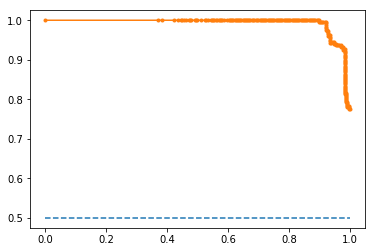

In [199]:
# estimator = load_model("model.h5")

# predict probabilities
est_probs = estimator.predict_proba(X_test)

# est_probs = (est_probs > 0.5)
# keep probabilities for the positive outcome only
est_probs = est_probs[:, 1]
# print(est_probs)
# predict class values
yhat = estimator.predict(X_test)
# yhat = (yhat > 0.5)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, est_probs)
# calculate F1 score
f1 = f1_score(y_test, yhat)
# calculate precision-recall AUC
auc_F = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, est_probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc_F, ap))
# plot no skill
pyplot.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(recall, precision, marker='.')
# show the plot
pyplot.show()

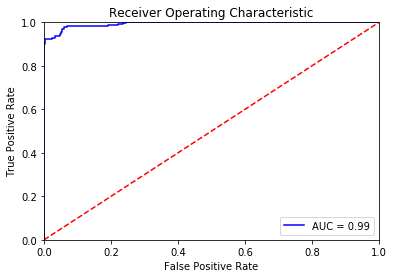

In [200]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, est_probs)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [201]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

print("Precision Score :", precision_score(y_test, yhat, average="macro"))
print("Recall Score :", recall_score(y_test, yhat, average="macro"))
print("F1 Score :", f1_score(y_test, yhat, average="macro"))
print("Accuracy Score :", accuracy_score(y_test, yhat))
print("Classification Report :\n", classification_report(y_test, yhat))
print("Confusion Matrix :\n", confusion_matrix(y_test, yhat))

Precision Score : 0.9543793665718469
Recall Score : 0.9568151631546828
F1 Score : 0.9550355421974142
Accuracy Score : 0.9551724137931035
Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       313
           1       0.93      0.98      0.95       267

    accuracy                           0.96       580
   macro avg       0.95      0.96      0.96       580
weighted avg       0.96      0.96      0.96       580

Confusion Matrix :
 [[293  20]
 [  6 261]]
